In [3]:
import Optimizer as op

o1 = op.optimizer(n_batch=100)
o1 = o1.set_datasets("mnist", is_one_hot=True)
o1.x_train_arr /= 255
o1.x_train_arr = o1.x_train_arr.reshape(-1, 1, 28, 28)
o1.y_train_arr = o1.x_train_arr
o = op.optimizer(n_batch=1000)
o.set_data(o1.x_train_arr, o1.x_train_arr, test_size=0.1)
o.set_variables()
#o = o.reshape((n_batch,1,28,28)).conv2d(kshape=(4,1,24,24)).relu().pool()
#o = o.reshape((1, 28, 28))
#o = o.conv_and_pool(1, 12, 12, mode="valid")
#o = o.conv_and_pool(1, 12, 12, mode="full")
o = o.conv2d((3, 1, 6, 6), mode="valid").relu()
o = o.conv2d((6, 3, 3, 3), mode="valid").sigmoid()
#o = o.conv2d((1, 1, 3, 3), mode="valid").relu()
#o = o.conv2d((1, 1, 3, 3), mode="full").relu()
o = o.conv2d((3, 6, 3, 3), mode="full").relu()
o = o.conv2d((1, 3, 6, 6), mode="full").relu()
#o = o.conv(1, 17, 17, mode="full")
#o = o.flatten().dense(784)
#$o = o.dense(100).dense(10).dense(100).dense(28*28)
#o = o.sigmoid().dense(10).sigmoid().dense(28*28).sigmoid()
o = o.loss_mse()
#o = o.softmax().loss_cross_entropy()
#o = o.dense(10).softmax().loss_cross_entropy()

o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,1)

Epoch. 0: loss = 1.3387e+05, acc = 6.8465e+01, valid. loss = 5.8216e+00, valid. acc. = 6.8465e+01.
Epoch. 1: loss = 3.7121e+00, acc = 8.7893e+01, valid. loss = 2.8284e+00, valid. acc. = 8.7893e+01.
Epoch. 2: loss = 2.4450e+00, acc = 9.3095e+01, valid. loss = 2.1187e+00, valid. acc. = 9.3095e+01.
Epoch. 3: loss = 1.8950e+00, acc = 9.7280e+01, valid. loss = 1.6937e+00, valid. acc. = 9.7280e+01.
Epoch. 4: loss = 1.5469e+00, acc = 1.0132e+02, valid. loss = 1.4116e+00, valid. acc. = 1.0132e+02.
Epoch. 5: loss = 1.3083e+00, acc = 1.0524e+02, valid. loss = 1.2105e+00, valid. acc. = 1.0524e+02.
Epoch. 6: loss = 1.1326e+00, acc = 1.0903e+02, valid. loss = 1.0602e+00, valid. acc. = 1.0903e+02.
Epoch. 7: loss = 1.0008e+00, acc = 1.1335e+02, valid. loss = 9.4337e-01, valid. acc. = 1.1335e+02.
Epoch. 8: loss = 8.9624e-01, acc = 1.1689e+02, valid. loss = 8.5026e-01, valid. acc. = 1.1689e+02.
Epoch. 9: loss = 8.1167e-01, acc = 1.1886e+02, valid. loss = 7.7393e-01, valid. acc. = 1.1886e+02.
Epoch. 10:

Epoch. 83: loss = 9.8355e-02, acc = 2.6327e+02, valid. loss = 9.7994e-02, valid. acc. = 2.6327e+02.
Epoch. 84: loss = 9.7656e-02, acc = 2.6940e+02, valid. loss = 9.7313e-02, valid. acc. = 2.6940e+02.
Epoch. 85: loss = 9.6992e-02, acc = 2.7191e+02, valid. loss = 9.6675e-02, valid. acc. = 2.7191e+02.
Epoch. 86: loss = 9.6368e-02, acc = 2.7913e+02, valid. loss = 9.6061e-02, valid. acc. = 2.7913e+02.
Epoch. 87: loss = 9.5767e-02, acc = 2.8258e+02, valid. loss = 9.5472e-02, valid. acc. = 2.8258e+02.
Epoch. 88: loss = 9.5200e-02, acc = 2.8486e+02, valid. loss = 9.4915e-02, valid. acc. = 2.8486e+02.
Epoch. 89: loss = 9.4657e-02, acc = 2.8656e+02, valid. loss = 9.4385e-02, valid. acc. = 2.8656e+02.
Epoch. 90: loss = 9.4153e-02, acc = 2.8845e+02, valid. loss = 9.3889e-02, valid. acc. = 2.8845e+02.
Epoch. 91: loss = 9.3645e-02, acc = 2.8974e+02, valid. loss = 9.3422e-02, valid. acc. = 2.8974e+02.
Epoch. 92: loss = 9.3205e-02, acc = 2.9097e+02, valid. loss = 9.2970e-02, valid. acc. = 2.9097e+02.


In [8]:
o = o.opt_Adam(0.001).compile()
o = o.optimize(10000000,1)

MemoryError: ('Error allocating 177811200 bytes of device memory (out of memory).', "you might consider using 'theano.shared(..., borrow=True)'")

In [9]:
o.dsize

56700

In [4]:

img = o.pred_func(o.x_train_arr[5:6])

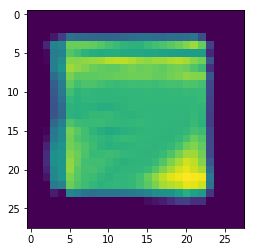

In [5]:
from pylab import *
%matplotlib inline
imshow(img.reshape(28,28))

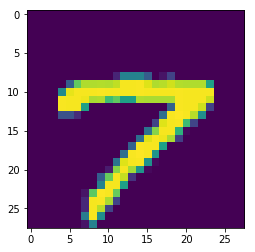

In [6]:
imshow(o.x_train_arr[5].reshape(28,28))

In [43]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Display the resulting frame
    font = cv2.FONT_HERSHEY_PLAIN
        #文字の書き込み
 #   cv2.putText(im,text,(w-length-from_edge-5,h-from_edge-hight),font, font_size,(255,255,0))

    cv2.imshow('frame',gray)
    #img = cv2.putText(gray,"%s" %o.pred_func([cv2.resize(gray.astype(np.float32)/255, (28,28)).flatten()])[0][0], (100, 100), font, 10, (255,255,255)) 
#    cv2.imshow('frame',img)
    cv2.imshow("conv",cv2.resize(o.pred_func([cv2.resize(-gray, (28,28)).reshape(1,28,28)]).reshape((28,28)), (1000, 1000)))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [10]:
o = optimizer(n_batch=500)
o.set_datasets("mnist", is_one_hot=False)
o = o.dense(10).loss_softmax_cross_entropy().opt_sgd(0.000001).optimize(100000,10000)

NameError: name 'optimizer' is not defined

In [42]:
# データとラベルの定義 ：サインカーブ
x_arr = random.rand(50).astype(theano.config.floatX) * 10
y_arr = sin(x_arr / 5. * pi)

# ネットワークの構築
o = optimizer(x_arr, y_arr)
o = o.taylor(1,6)\         # 1層目：(自称)テイラー展開層
     .tanh()\              # tanhの活性化関数
     .dense(1)\      　    # 2層目：全結合層
     .loss(alpha=0.1)\     # 損失関数の定義(学習率0.1)
     .optimize()       

In [1]:

import Optimizer as op

o1 = op.optimizer(n_batch=100)
o1 = o1.set_datasets("mnist", is_one_hot=True)
o1.x_train_arr /= 255
o = op.optimizer(n_batch=128)
o.set_data(o1.x_train_arr, o1.y_train_arr, test_size=0.1)
o.set_variables()
#o = o.conv(1, 17, 17, mode="full")
o = o.dense(10).sigmoid().softmax()
#$o = o.dense(100).dense(10).dense(100).dense(28*28)
#o = o.sigmoid().dense(10).sigmoid().dense(28*28).sigmoid()
o = o.loss_cross_entropy()

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5110)
/home/yu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


784 10


In [18]:
o = o.opt_sgd(0.01).compile().optimize(100000, 10)


Epoch. 0: loss = 2.3010e-01, acc = 1.3099e-01, valid. loss = 2.3011e-01, valid. acc. = 1.3099e-01.
Epoch. 10: loss = 2.3010e-01, acc = 1.3099e-01, valid. loss = 2.3011e-01, valid. acc. = 1.3099e-01.
Epoch. 20: loss = 2.3011e-01, acc = 1.3099e-01, valid. loss = 2.3011e-01, valid. acc. = 1.3099e-01.
Epoch. 30: loss = 2.3008e-01, acc = 1.3099e-01, valid. loss = 2.3011e-01, valid. acc. = 1.3099e-01.
Epoch. 40: loss = 2.3012e-01, acc = 1.3099e-01, valid. loss = 2.3011e-01, valid. acc. = 1.3099e-01.
KeyboardInterrupt



In [19]:
o.y_train_arr

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

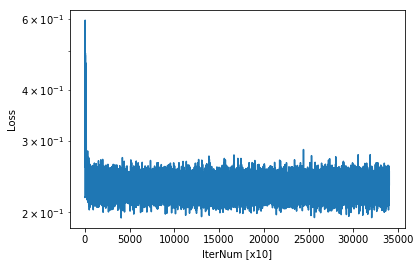

In [7]:
o.view()

In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s - loss: 0.3489 - acc: 0.8927 - val_loss: 0.0843 - val_acc: 0.9746
Epoch 2/12
60000/60000 [==============================] - 5s - loss: 0.1205 - acc: 0.9653 - val_loss: 0.0605 - val_acc: 0.9812
Epoch 3/12
60000/60000 [==============================] - 5s - loss: 0.0901 - acc: 0.9739 - val_loss: 0.0428 - val_acc: 0.9858
Epoch 4/12
60000/60000 [==============================] - 5s - loss: 0.0736 - acc: 0.9790 - val_loss: 0.0389 - val_acc: 0.9863
Epoch 5/12
60000/60000 [==============================] - 5s - loss: 0.0632 - acc: 0.9813 - val_loss: 0.0364 - val_acc: 0.9876
Epoch 6/12
60000/60000 [==============================] - 5s - loss: 0.0575 - acc: 0.9829 - val_loss: 0.0340 - val_acc: 0.9879
Epoch 7/12
60000/60000 [==============================] - 5s - loss: 0.0531 - acc: 0.9844 - val_loss: 0.0325 - val_

In [1]:
import Optimizer as op

o1 = op.optimizer(n_batch=100)
o1 = o1.set_datasets("mnist", is_one_hot=True)
o1.x_train_arr /= 255
o1.x_train_arr = o1.x_train_arr.reshape(-1, 1, 28, 28)
o1.y_train_arr = o1.x_train_arr
o = op.optimizer(n_batch=1000)
o.set_data(o1.x_train_arr, o1.x_train_arr, test_size=0.1)
o.set_variables()
o = o.conv2d((1, 1, 28, 28), mode="same").relu()
o = o.loss_mse()
#o = o.softmax().loss_cross_entropy()
#o = o.dense(10).softmax().loss_cross_entropy()

o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,1)


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5110)
/home/yu/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


13 14 13 14
Epoch. 0: loss = 3.6420e+02, acc = 6.0821e+02, valid. loss = 1.3233e-01, valid. acc. = 6.0821e+02.
Epoch. 1: loss = 1.2369e-01, acc = 6.1779e+02, valid. loss = 1.2214e-01, valid. acc. = 6.1779e+02.
Epoch. 2: loss = 1.2182e-01, acc = 6.1820e+02, valid. loss = 1.2173e-01, valid. acc. = 6.1820e+02.
KeyboardInterrupt



In [2]:
o = o.opt_Adam(0.01).compile()
o = o.optimize(10000000,1)

Epoch. 0: loss = 1.1273e-01, acc = 6.3388e+02, valid. loss = 1.1243e-01, valid. acc. = 6.3388e+02.
Epoch. 1: loss = 1.1231e-01, acc = 6.3388e+02, valid. loss = 1.1243e-01, valid. acc. = 6.3388e+02.
Epoch. 2: loss = 1.1233e-01, acc = 6.3388e+02, valid. loss = 1.1243e-01, valid. acc. = 6.3388e+02.
KeyboardInterrupt



In [3]:
from numpy import *

In [4]:
convolve([1,2,3,4], [1,1,1,1], "same")

array([ 3,  6, 10,  9])

In [9]:
v =array([1,2,3,4])
w =array([1,1,1,1])
i = (v.size - (w.size - 1)) //2
if i == 0: i=1
convolve(v, w, "full")[i:-i-1]

array([ 3,  6, 10,  9])

In [21]:
5-(4-1)

2

In [6]:
i

0

In [8]:
1/2

0.5

In [2]:
th

NameError: name 'th' is not defined

In [6]:
import theano as th
from numpy import *


ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: CorrMM{valid, (1, 1), (1, 1)}(TensorConstant{[[[[0 1 2 3]]]]}, TensorConstant{[[[[3 2 1 0]]]]})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/home/yu/anaconda3/lib/python3.5/site-packages/theano/gof/opt.py", line 1982, in process_node
    replacements = lopt.transform(node)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/theano/tensor/opt.py", line 6450, in constant_folding
    no_recycling=[], impl=impl)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/theano/gof/op.py", line 935, in make_thunk
    no_recycling)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/theano/gof/op.py", line 839, in make_c_thunk
    output_storage=node_output_storage)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/theano/gof/cc.py", line 1190, in make_thunk
    keep_lock=keep_lock)
  File "/home/yu/anaconda3/lib/python3.5/site-p

AssertionError: 

In [29]:
th.config.floatX

'float32'

In [32]:
import theano.tensor as T
from theano.tensor import nnet
m = T.matrix()
w = T.matrix()

#ランク4にする必要がある。
o_full = nnet.conv.conv2d(m[None,None,:,:], w[None,None,:,:],
                          border_mode='full')


In [68]:
m_arr = ones((1, 4)).astype(float32)
w_arr = ones((1, 4)).astype(float32)

In [71]:
o_full.eval({m:m_arr,w:w_arr})[0,0,0,1:-2]

array([ 2.,  3.,  4.,  3.], dtype=float32)

In [70]:
convolve(ones(4), ones(4), "same")

array([ 2.,  3.,  4.,  3.])

In [67]:
h_v = 5; h_k=3
h_add = (h_k - 1)
h_m   = (h_v - h_add)
print(h_m)

3


In [ ]:
import theano
import theano.tensor as T
import theano.tensor.signal as signal 
import scipy.signal as s

m = T.matrix()
w = T.matrix()

#ランク4にする必要がある。
o_full = nnet.conv.conv2d(m[None,None,:,:], w[None, None,:,:],
                          border_mode='full')
o_valid = nnet.conv.conv2d(m[None,None,:,:], w[None, None,:,:],
                          border_mode='valid')

m_arr = arange(25.).reshape((5,5)).astype(float32)
w_arr = ones((3,3)).astype(float32)
print("m_arr =")
print(m_arr)
print("w_arr =")
print(w_arr)

print("Output for Theano.")
print("full:")
print(o_full.eval({m:m_arr, w:w_arr}).round().astype(int))
print("valid:")
print(o_valid.eval({m:m_arr, w:w_arr}).round().astype(int))

print("Output for scipy.")
print("full:")
print(s.fftconvolve(m_arr, w_arr, "full").round().astype(int))
print("valid:")
print(s.fftconvolve(m_arr, w_arr, "valid").round().astype(int))

In [24]:

o_full.eval({m:ones((4,4))*1., w:ones((4,4))*1.})

TypeError: Bad input argument to theano function with name "<ipython-input-21-3cc08bb00d24>:1" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/yu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-f11ef3e74301>", line 4, in <module>
    w = T.matrix()
TensorType(float32, matrix) cannot store a value of dtype float64 without risking loss of precision. If you do not mind this loss, you can: 1) explicitly cast your data to float32, or 2) set "allow_input_downcast=True" when calling "function". Value: "array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])"

In [16]:
m

InplaceDimShuffle{x,x,0,1}.0

In [17]:
import theano
import theano.tensor as T
import theano.tensor.signal as signal 
import scipy.signal as s

m = T.matrix()
w = T.matrix()

#ランク4にする必要がある。
o_full = nnet.conv.conv2d(m[None,None,:,:], w[None, None,:,:],
                          border_mode='full')
o_valid = nnet.conv.conv2d(m[None,None,:,:], w[None, None,:,:],
                          border_mode='valid')

m_arr = arange(25.).reshape((5,5)).astype(float32)
w_arr = ones((3,3)).astype(float32)
print("m_arr =")
print(m_arr)
print("w_arr =")
print(w_arr)

print("Output for Theano.")
print("full:")
print(o_full.eval({m:m_arr, w:w_arr}).round().astype(int))
print("valid:")
print(o_valid.eval({m:m_arr, w:w_arr}).round().astype(int))

print("Output for scipy.")
print("full:")
print(s.fftconvolve(m_arr, w_arr, "full").round().astype(int))
print("valid:")
print(s.fftconvolve(m_arr, w_arr, "valid").round().astype(int))

m_arr =
[[  0.   1.   2.   3.   4.]
 [  5.   6.   7.   8.   9.]
 [ 10.  11.  12.  13.  14.]
 [ 15.  16.  17.  18.  19.]
 [ 20.  21.  22.  23.  24.]]
w_arr =
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
Output for Theano.
full:
[[[[  0   1   3   6   9   7   4]
   [  5  12  21  27  33  24  13]
   [ 15  33  54  63  72  51  27]
   [ 30  63  99 108 117  81  42]
   [ 45  93 144 153 162 111  57]
   [ 35  72 111 117 123  84  43]
   [ 20  41  63  66  69  47  24]]]]
valid:
[[[[ 54  63  72]
   [ 99 108 117]
   [144 153 162]]]]
Output for scipy.
full:
[[  0   1   3   6   9   7   4]
 [  5  12  21  27  33  24  13]
 [ 15  33  54  63  72  51  27]
 [ 30  63  99 108 117  81  42]
 [ 45  93 144 153 162 111  57]
 [ 35  72 111 117 123  84  43]
 [ 20  41  63  66  69  47  24]]
valid:
[[ 54  63  72]
 [ 99 108 117]
 [144 153 162]]


In [18]:
m_arr

array([[  0.,   1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.,   9.],
       [ 10.,  11.,  12.,  13.,  14.],
       [ 15.,  16.,  17.,  18.,  19.],
       [ 20.,  21.,  22.,  23.,  24.]], dtype=float32)